In [1]:
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import pandas as pd

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

In [5]:
#Song Duration: length of the track in milliseconds.

#Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. Typically, acoustic music is defined as music generated without any electronic amplification.

#Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#Energy: It indicates a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

#Instrumentalness: It indicates the absence of vocals in a track. Hence, songs made completely playing an instrument would have a value of 1 while rap songs without any background music would have a value close to 0. “Ooh” and “aah” sounds are treated as instrumental in this context.

#Key: It indicates the overall key of the track as an interger which can be mapped using using standard Pitch Class notation

#Liveness: It indidicates the probability of the track being performed live in front of an audience.

#Loudness: It gives us the relative loudness of the track in decibels(dB) where the values varry between -60 and 0 dB.

#Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

#Speechiness: It is a measure of the presence of words (spoken/sung by humans)in a tracks. A piece of recording of a podcast or audio book would have almost 1.0 value while a song made with only playing instruments would have a value 0.

#Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#Time Signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

#Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

#Song Popularity: If the values is 100, it indicates that the song is popular wheras if the value is 0 it indicates that the song is unpopular

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [7]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [8]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [9]:
#NaNs proportion in each column
nans = data.isnull().sum() 
nans_table = pd.DataFrame({'column_name': data.columns, 
                                 'NaNs number': nans, 'NaNs %': nans * 100 / data.shape[0]})
nans_table
#пропущенные значения есть для key, popularity, instrumentalness (большая доля)

,column_name,NaNs number,NaNs %
Artist Name,Artist Name,0,0.000000
Track Name,Track Name,0,0.000000
Popularity,Popularity,428,2.378306
danceability,danceability,0,0.000000
energy,energy,0,0.000000
key,key,2014,11.191376
loudness,loudness,0,0.000000
mode,mode,0,0.000000
speechiness,speechiness,0,0.000000
acousticness,acousticness,0,0.000000


In [10]:
#converting numbers into categorial variables (key, class, time_signature, mode)
data['key'] = data.key.astype('category')
data['mode'] = data['mode'].astype('category')
data['Class'] = data.Class.astype('category') 
data['time_signature'] = data.time_signature.astype('category')

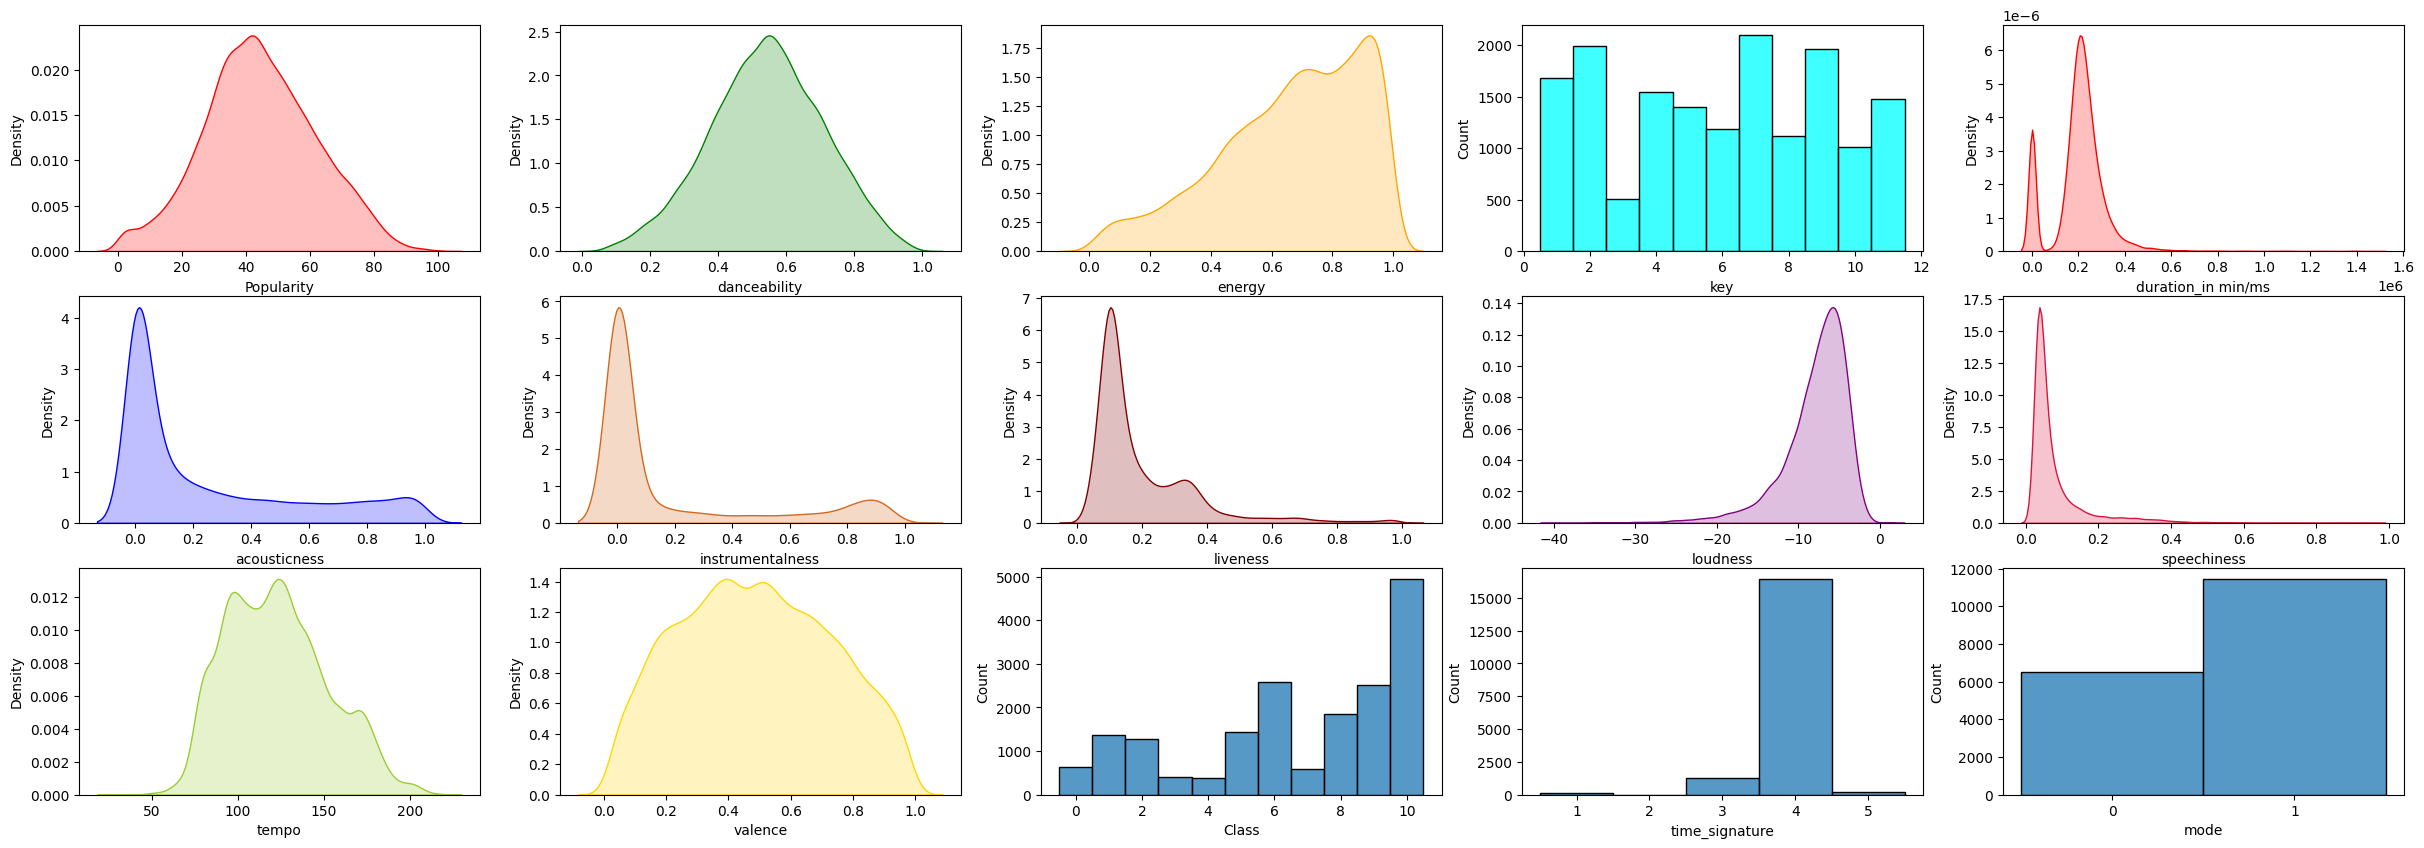

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize =(30,10))
sns.kdeplot(data = data, x = "Popularity", color='red', fill = True, ax = axes[0,0])
sns.kdeplot(data = data, x = "danceability", color='green', fill = True, ax = axes[0,1])
sns.kdeplot(data = data, x = "energy", color='orange', fill = True, ax = axes[0,2])
#sns.kdeplot(data = data, x = "key", color='cyan', fill = True, ax = axes[0,3])
sns.kdeplot(data = data, x = "duration_in min/ms", color='red', fill = True, ax = axes[0,4])
sns.kdeplot(data = data, x = "acousticness", color='blue', fill = True, ax = axes[1,0])
sns.kdeplot(data = data, x = "instrumentalness", color='chocolate', fill = True, ax = axes[1,1])
sns.kdeplot(data = data, x = "liveness", color='maroon', fill = True, ax = axes[1,2])
sns.kdeplot(data = data, x = "loudness", color='purple', fill = True, ax = axes[1,3])
sns.kdeplot(data = data, x = "speechiness", color='crimson', fill = True, ax = axes[1,4])
sns.kdeplot(data = data, x = "tempo", color='yellowgreen', fill = True, ax = axes[2,0])
sns.kdeplot(data = data, x = "valence", color='gold', fill = True, ax = axes[2,1])
sns.histplot(data = data, x = "key", color='cyan', fill = True, ax = axes[0,3])
sns.histplot(data = data, x = "Class", fill = True, ax = axes[2,2])
sns.histplot(data = data, x = "time_signature", fill = True, ax = axes[2,3])
sns.histplot(data = data, x = "mode", fill = True, ax = axes[2,4])
plt.xticks([0,1])
plt.show()   
#В данных преобладают энергичные песни (energy), поп-жандр (класс 10), с низким уровнем acousticness и instrumentalness
#для переменных popularity, danceability, valence, tempo можно наблюдать наиболее равномерное распределение
#песен c mode=1 в два раза больше, чем с mode=0
#наименьшее число песен с key=3

In [12]:
#Plotting correlations
corr = data.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm')
#Видим значимые положительные корреляции для energy-loudness, energy-valence
#Отрицательная зависимость для energy-acousticness, loudness-acousticness

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
Popularity,1.000000,0.167213,0.051538,0.124915,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118
danceability,0.167213,1.000000,-0.093838,0.059723,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624
energy,0.051538,-0.093838,1.000000,0.767869,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768
loudness,0.124915,0.059723,0.767869,1.000000,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010
speechiness,0.031664,0.199042,0.125427,0.096027,1.000000,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044
acousticness,-0.125410,0.009055,-0.745963,-0.612824,-0.086648,1.000000,0.174139,-0.111393,-0.122547,-0.168318,-0.322583
instrumentalness,-0.167661,-0.200752,-0.180276,-0.343672,-0.067632,0.174139,1.000000,-0.047189,-0.228144,-0.038586,-0.004551
liveness,-0.072298,-0.109485,0.195634,0.112022,0.070406,-0.111393,-0.047189,1.000000,0.021076,0.033515,0.053885
valence,0.054824,0.444548,0.222998,0.181086,0.053885,-0.122547,-0.228144,0.021076,1.000000,0.051128,-0.097126
tempo,-0.006050,-0.183527,0.210224,0.164272,0.048948,-0.168318,-0.038586,0.033515,0.051128,1.000000,0.045133


In [13]:
#Analysis of numeric variables with potential outliears
from outliears import run_eda

run_eda(data)

Analysis of numeric variables: 
----------------------------------
For Popularity column
mean=44.51212431693989,  max=100.0,  min=1.0,  std=17.426431717361012,  median=44.0,  Q25=33.0,  Q75=56.0
Number of outliers (± 1.5 IQR rule): 9033
For danceability column
mean=0.5434332184929985,  max=0.989,  min=0.0596,  std=0.1662638599078837,  median=0.545,  Q25=0.432,  Q75=0.659
Number of outliers (± 1.5 IQR rule): 8985
For energy column
mean=0.6627767470715714,  max=1.0,  min=2.03e-05,  std=0.23536683520791088,  median=0.7,  Q25=0.509,  Q75=0.86
Number of outliers (± 1.5 IQR rule): 8985
For loudness column
mean=-7.9106597577239395,  max=1.355,  min=-39.952,  std=4.049038503225858,  median=-7.016,  Q25=-9.538,  Q75=-5.189
Number of outliers (± 1.5 IQR rule): 8993
For speechiness column
mean=0.07970699599911092,  max=0.955,  min=0.0225,  std=0.08357374102151313,  median=0.0474,  Q25=0.0348,  Q75=0.083
Number of outliers (± 1.5 IQR rule): 8969
For acousticness column
mean=0.24708167183929763,  m

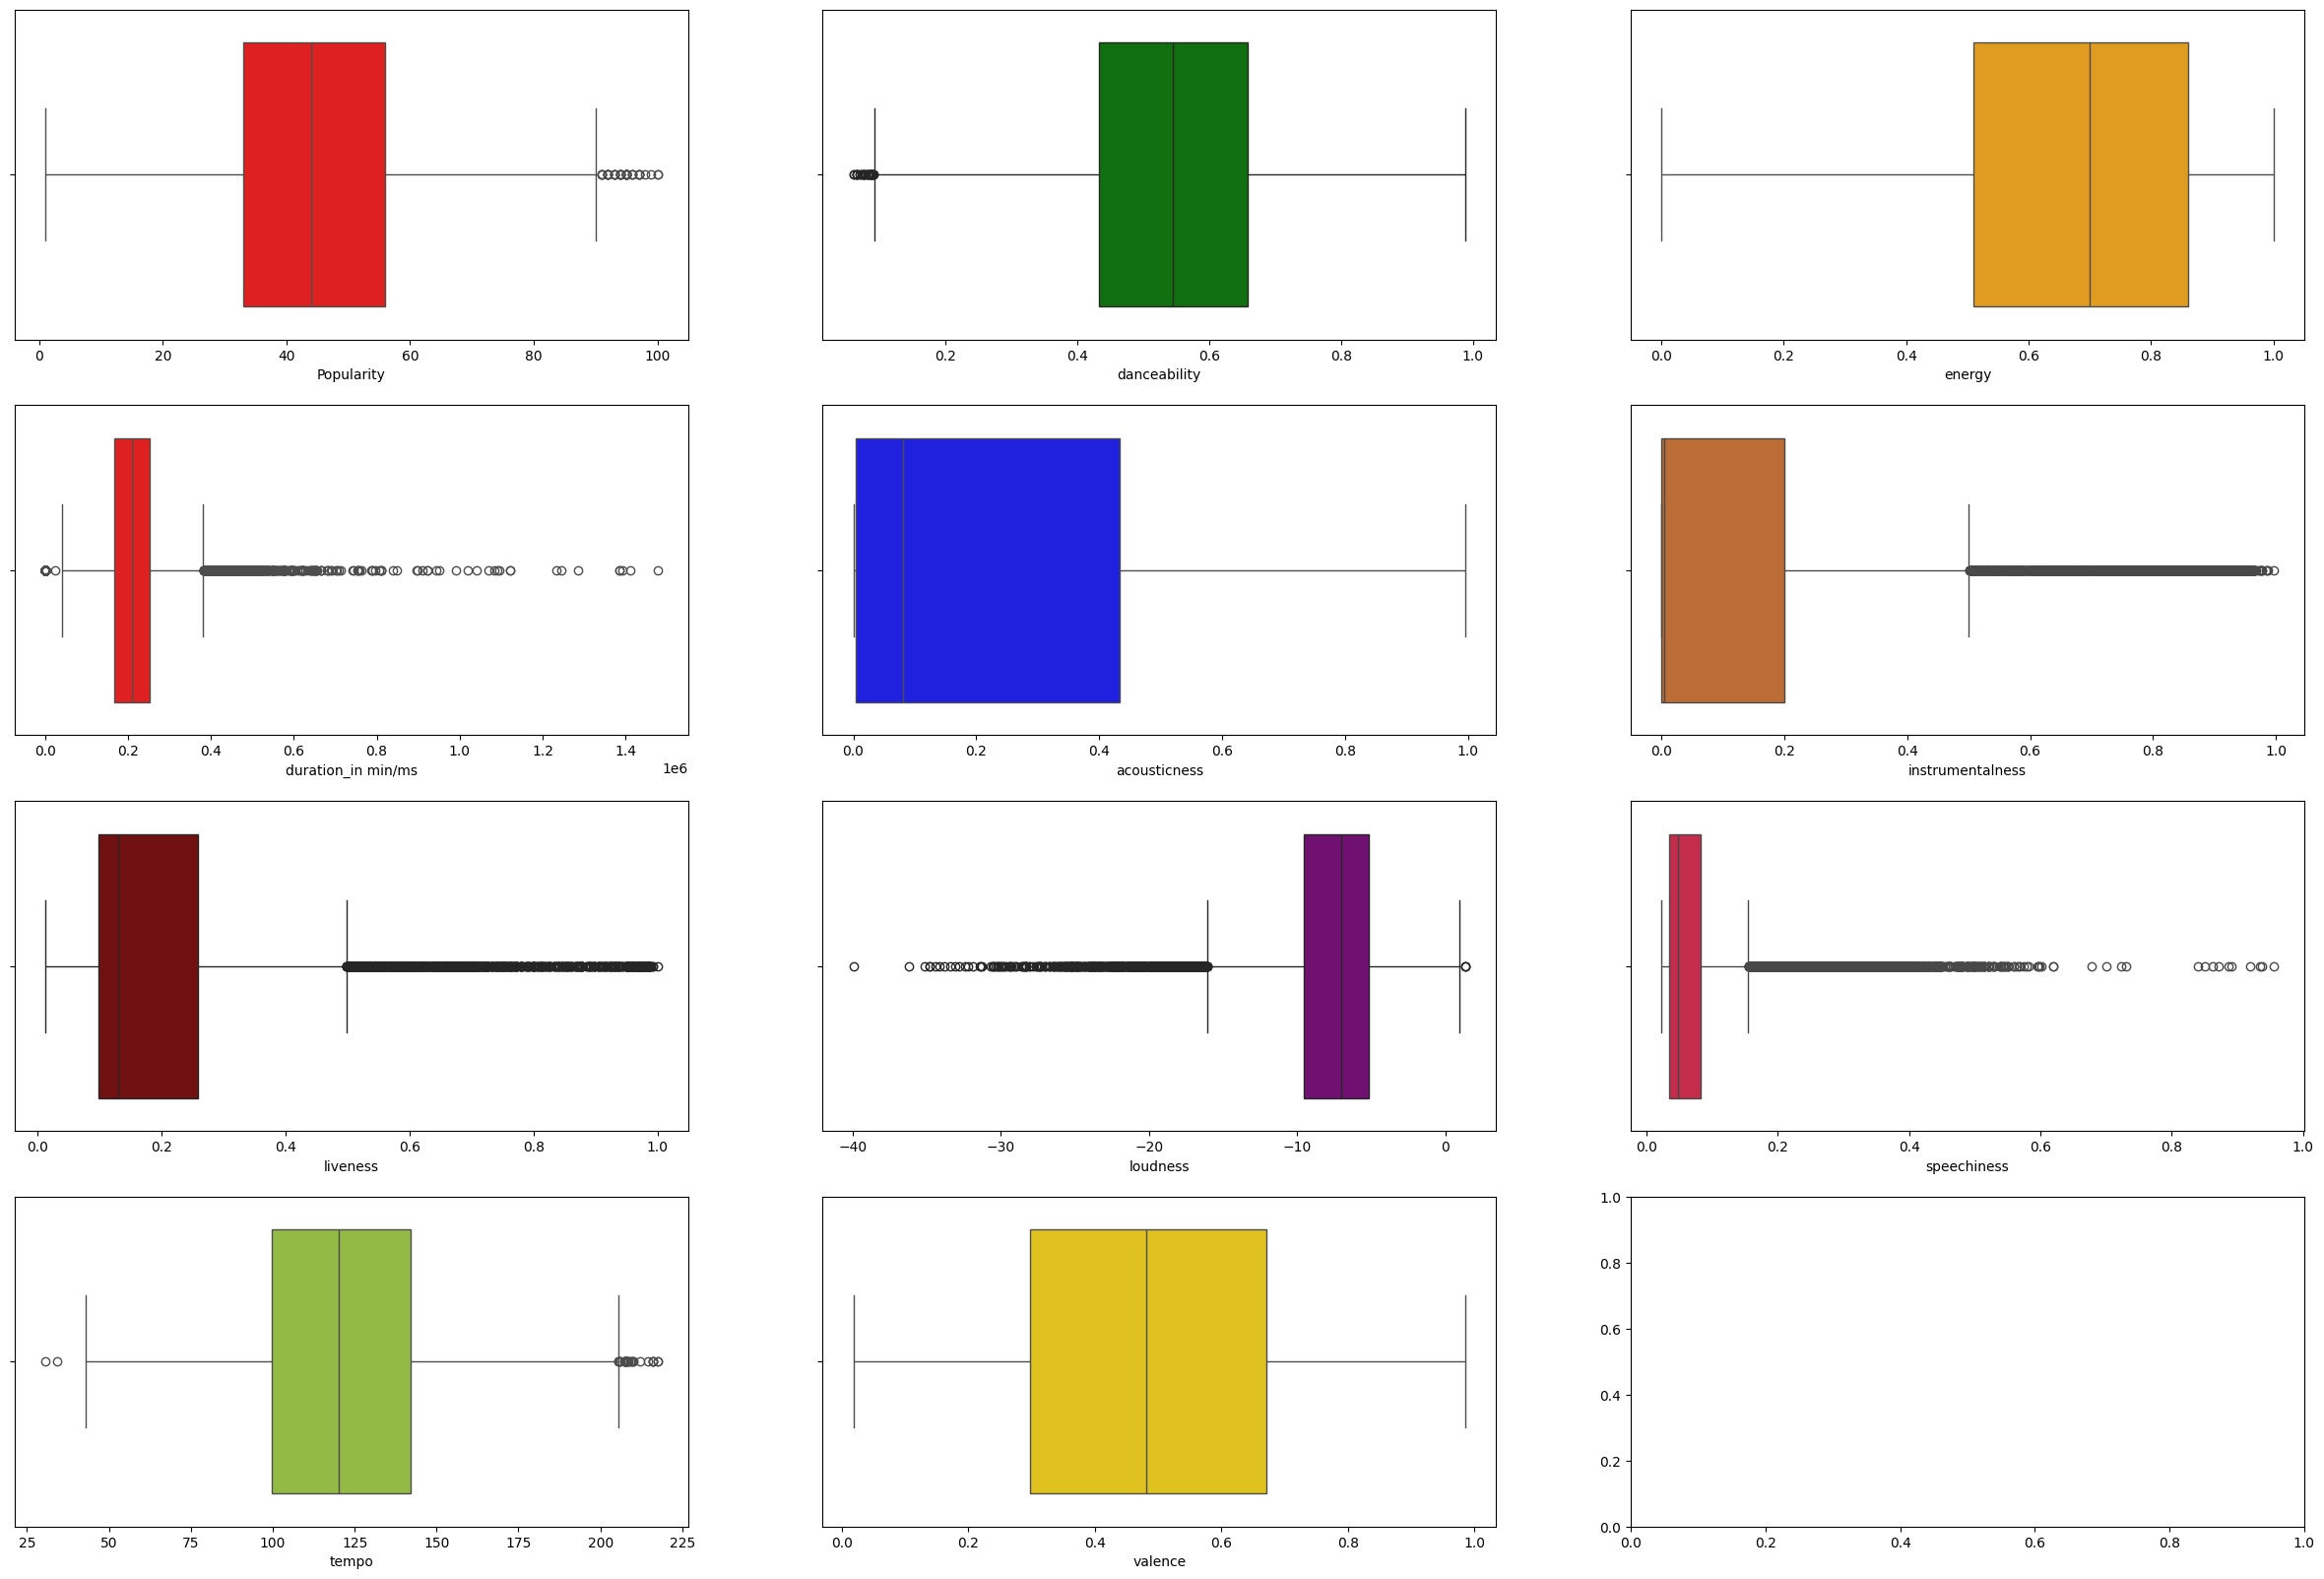

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize =(30,20))

sns.boxplot(data = data, x = "Popularity", color='red', fill = True, ax = axes[0,0])
sns.boxplot(data = data, x = "danceability", color='green', fill = True, ax = axes[0,1])
sns.boxplot(data = data, x = "energy", color='orange', fill = True, ax = axes[0,2])
sns.boxplot(data = data, x = "duration_in min/ms", color='red', fill = True, ax = axes[1,0])
sns.boxplot(data = data, x = "acousticness", color='blue', fill = True, ax = axes[1,1])
sns.boxplot(data = data, x = "instrumentalness", color='chocolate', fill = True, ax = axes[1,2])
sns.boxplot(data = data, x = "liveness", color='maroon', fill = True, ax = axes[2,0])
sns.boxplot(data = data, x = "loudness", color='purple', fill = True, ax = axes[2,1])
sns.boxplot(data = data, x = "speechiness", color='crimson', fill = True, ax = axes[2,2])
sns.boxplot(data = data, x = "tempo", color='yellowgreen', fill = True, ax = axes[3,0])
sns.boxplot(data = data, x = "valence", color='gold', fill = True, ax = axes[3,1])
plt.show()   

#Большое число выбивающихся наблюдений для переменных duration, popularity,spheechiness, instrumentlness, liveliness, loudness. 
#Однако связи с их больши количеством буде ошибкой ими пренебречь.

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [8]:
#Data cleaning
data2 = data.drop(columns=['Artist Name', 'Track Name'], axis=1)

In [9]:
#Replacing the missing values with the mean
#пропущенные значения есть в popularity, key, instrumentalness
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data2)
imputer_data = imputer.transform(data2)
data_no_na = pd.DataFrame(imputer_data, columns=data2.columns)
#Я решила заменить средним, так как медиана для instrumentalness сильно смещена в сторону низких значений, 
#при этом распредление у popularity близко к нормальному 

In [10]:
data_no_na['key'] = data2.key.astype('category') 
data_no_na['mode'] = data2['mode'].astype('category')
data_no_na['Class'] = data2.Class.astype('category') 
data_no_na['time_signature'] = data2.time_signature.astype('category')

In [11]:
tree_data = data_no_na
X = tree_data.iloc[:,0:14]
y = tree_data['Class']

In [12]:
data_key = tree_data
data_key.key = data_key.key.cat.add_categories(5.5).fillna(5.5)
Xk = data_key.iloc[:,0:14]
yk = data_key['Class']

In [20]:
#Для первой модели возьму параметры дерева по дефолту
X_train, X_test, y_train, y_test = train_test_split(X, y)
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk)
#print(np.unique(X_train.key))
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#Accuracy: 0.4338741942653923

Accuracy: 0.4225383418537453


In [ ]:
labels = [str(i) for i in range(0,11)]
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,  
                   class_names= labels,
                   filled=True)
plt.show()

In [22]:
#воспульзуюсь Scaler, GridSearchCV и PCA c целью увеличить accuracy
pca = decomposition.PCA()
n_components = list(range(1,X.shape[1]+1))
metrics = ["gini", "entropy"]
max_depth = list(range(1,10,2))
pipe = Pipeline(steps=[("pca", pca), ("dtc", DecisionTreeClassifier())])
params = {'pca__n_components':n_components,'dtc__max_depth':max_depth, 'dtc__criterion':metrics}

In [ ]:
grid_search = GridSearchCV(pipe, params)

grid_search.fit(Xk_train, yk_train)
result = cross_val_score(grid_search, Xk_train, yk_train, scoring="accuracy")
print(result)
print(result.mean())
print(result.std())

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. Аватар легенда об Аанге

2. 

3.